# Gaussian model

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error

## Dataset

In [17]:
df_hair = pd.read_csv('F:/Machine Learning/GaussianNB/Factor-Hair-Revised.csv', sep=';')

In [18]:
df_hair[:5]

,Quality,Comunication,Hability,polite,Advertising,products,staff_image,price,Customer_care,order_billing,speed,Satisfaction
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [20]:
train = df_hair.drop(columns=['Satisfaction'])
test = df_hair['Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.20)

In [21]:
print('Min satisfaction:', test.min())
print('Max satisfaction:', test.max())

Min satisfaction: 4.7
Max satisfaction: 9.9


## Classification

(array([ 8., 14.,  7., 17., 14., 17., 10.,  7.,  5.,  1.]),
 array([4.7 , 5.22, 5.74, 6.26, 6.78, 7.3 , 7.82, 8.34, 8.86, 9.38, 9.9 ]),
 <BarContainer object of 10 artists>)

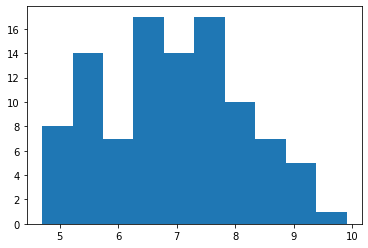

In [22]:
plt.hist(df_hair['Satisfaction'])

In [23]:
def satisfaction_classification(satisfaction):
    if satisfaction <=7:
        return 0 #user unsatisfy
    else:
        return 1 #user satisfy
    
df_hair['satisfaction_class'] = df_hair.apply(lambda x: satisfaction_classification(x['Satisfaction']), axis=1)

In [24]:
df_hair['satisfaction_class'].mean()

0.5

In [25]:
train_2 = df_hair.drop(columns=['Satisfaction', 'satisfaction_class'])
test_2 = df_hair['satisfaction_class']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_2, test_2, test_size=0.20)

In [26]:
nb = GaussianNB()
nb.fit(X_train_2, y_train_2)

preds_train = nb.predict(X_train_2)

print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train, y_train_2))
print()
print('F1 SCORE:\n', f1_score(preds_train, y_train_2))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train, y_train_2))

CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[27  4]
 [12 37]]

F1 SCORE:
 0.8222222222222222

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.69      0.87      0.77        31
           1       0.90      0.76      0.82        49

    accuracy                           0.80        80
   macro avg       0.80      0.81      0.80        80
weighted avg       0.82      0.80      0.80        80



In [32]:
#Classification in test
preds_trest = nb.predict(X_test_2)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest, y_test_2))
print()
print('F1 SCORE:\n', f1_score(preds_trest, y_test_2))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest, y_test_2))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[9 2]
 [2 7]]

F1 SCORE:
 0.7777777777777778

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20

